# 聚合的层次聚类（原始数据）

## 一、库导入

In [226]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt #绘图

from scipy.cluster.hierarchy import dendrogram, linkage,cut_tree #层次聚类与树状图

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,silhouette_score

from seaborn import pairplot

## 二、全局参数设置

In [227]:
mpl.rcParams['figure.dpi']= 300

np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(30,10))
%matplotlib inline 
plt.style.use('seaborn')

## 三、原始数据集导入

In [228]:
path = './seeds_dataset.txt'
head = ['area', 'perimeter', 'compactness', 'kernel_length', 
        'kernel_width', 'assymetry_coeff', 'groove_length', 'type']

Origin_data = pd.read_csv(path, sep='\t', names=head, index_col=False)

print("从seeds_dataset.txt导入210条数据，预览前10条：")
Origin_data.head(11) #显示前10条数据

从seeds_dataset.txt导入210条数据，预览前10条：


,area,perimeter,compactness,kernel_length,kernel_width,assymetry_coeff,groove_length,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [229]:
X = Origin_data.iloc[:,:-1].values  # 切片提取除type外的行数据
Y = (Origin_data.iloc[:,-1] - 1).values  # 提取type数据  (1,2,3)->(0,1,2)
X,Y

(array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
        [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
        [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
        ...,
        [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
        [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
        [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

## 四、聚合层次聚类：四种聚合策略与准确度/轮廓系数

使用了以下四种合并簇的策略，并计算对应策略的准确度：

1. Single link：0.37142857142857144

2. Complete link：0.8047619047619048

3. Average link：0.9095238095238095

4. Centroid link：0.819047619047619


## 1.Single link：基于最相似成员相似性


- 合并簇依据：两个簇最相似成员的相似性最小

- 基于局部相似性：更强调封闭区域，忽略集群的整体结构

- 能够对非椭圆形状的物体群进行聚类

- 对噪声和异常值敏感

- 相似性度量：欧拉距离

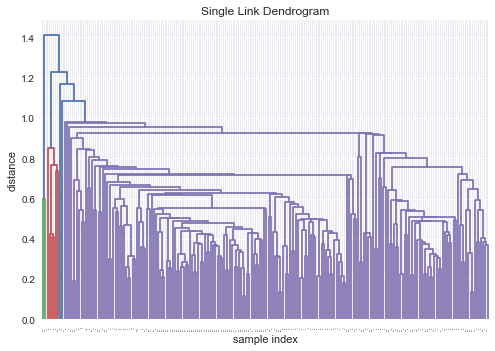

accuracy for Single Link: 0.37142857142857144
silhouette for Single Link: 0.046888803908863554


In [230]:
Z1 = linkage(X, 'single')

dendrogram(Z1)
plt.title('Single Link Dendrogram')
plt.xlabel('sample index') #数字
plt.xticks(size = 2)
plt.ylabel('distance')
plt.show()

label_predict1 = cut_tree(Z1,n_clusters = 3) #树剪枝(聚三类)，按数据集数据条目顺序的分类标签

silhouette1 = silhouette_score(Origin_data,label_predict1.ravel()) #轮廓系数

label_predict1 = label_predict1.tolist()
for i in range(0,len(label_predict1)):
    label_predict1[i] = label_predict1[i][0]
#print(label_predict1)

accuracy1 = accuracy_score(Y,label_predict1) #正确分类的比例
print('accuracy for Single Link:',accuracy1)
print('silhouette for Single Link:',silhouette1)

## 2.Complete link：基于最不相似成员相似性

- 合并簇依据：两个簇最不相似成员的相似性最小

- 合并两个簇形成一个最小直径的簇

- 在行为上是非局部的，得到紧凑形状的团簇

- 对异常值敏感

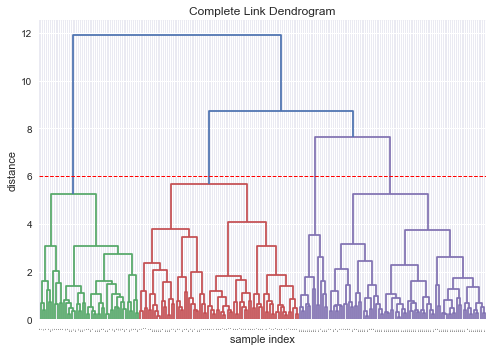

accuracy for Complete Link: 0.8047619047619048
silhouette for Complete Link: 0.43935412743357094


In [231]:
from scipy.cluster.hierarchy import cut_tree
Z2 = linkage(X, 'complete')

dendrogram(Z2) #树形图
plt.title('Complete Link Dendrogram')
plt.xlabel('sample index') #数字
plt.xticks(size = 2)
plt.ylabel('distance')
plt.axhline(y=6, c='red', lw=1, linestyle='dashed') #划横线聚成3类
plt.show()

label_predict2 = cut_tree(Z2,n_clusters = 3) #树剪枝(聚三类)，按数据集数据条目顺序的分类标签

silhouette2 = silhouette_score(Origin_data,label_predict2.ravel()) #轮廓系数

label_predict2 = label_predict2.tolist()
for i in range(0,len(label_predict2)):
    label_predict2[i] = label_predict2[i][0]
#print(label_predict)

for i in range(0,len(label_predict2)): #聚类标签顺序调换
    if(label_predict2[i] == 1):
        label_predict2[i] = 2
    elif(label_predict2[i] == 2):
        label_predict2[i] = 1
#print(label_predict)

accuracy2 = accuracy_score(Y,label_predict2) #正确分类的比例
print('accuracy for Complete Link:',accuracy2)
print('silhouette for Complete Link:',silhouette2)


## 3.Average link：基于平均距离

- 合并簇依据：两个集群的元素之间所有对的平均距离最小


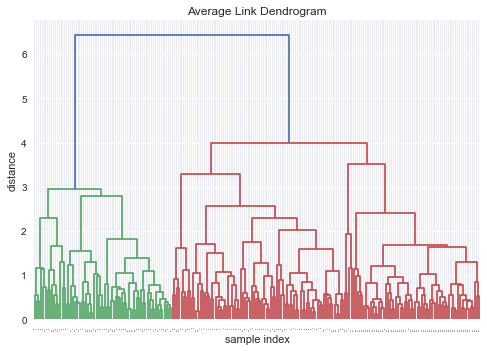

accuracy for Average Link: 0.9095238095238095
silhouette for Average Link: 0.47280495690365504


In [232]:
Z3 = linkage(X, 'average')

dendrogram(Z3)
plt.title('Average Link Dendrogram')
plt.xlabel('sample index') #数字
plt.xticks(size = 2)
plt.ylabel('distance')
plt.show()

label_predict3 = cut_tree(Z3,n_clusters = 3) #树剪枝(聚三类)，按数据集数据条目顺序的分类标签
silhouette3 = silhouette_score(Origin_data,label_predict3.ravel()) #轮廓系数
label_predict3 = label_predict3.tolist()
for i in range(0,len(label_predict3)):
    label_predict3[i] = label_predict3[i][0]
#print(label_predict)

for i in range(0,len(label_predict3)): #聚类标签顺序调换
    if(label_predict3[i] == 1):
        label_predict3[i] = 2
    elif(label_predict3[i] == 2):
        label_predict3[i] = 1
#print(label_predict)

accuracy3 = accuracy_score(Y,label_predict3) #正确分类的比例
print('accuracy for Average Link:',accuracy3)
print('silhouette for Average Link:',silhouette3)

## 4.Centroid link：基于中心链接

- 合并簇依据：两个簇的中心的距离最小

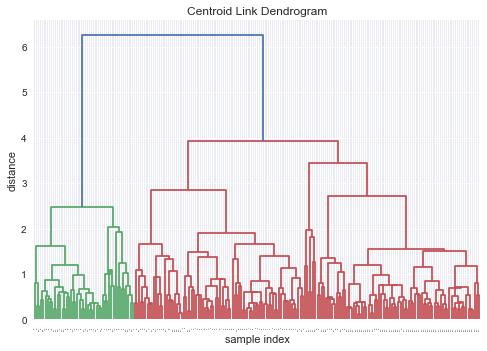

accuracy for Centroid Link: 0.819047619047619
silhouette for Centroid Link: 0.4396438860791805


In [233]:
Z4 = linkage(X, 'centroid')

dendrogram(Z4)
plt.title('Centroid Link Dendrogram')
plt.xlabel('sample index') #数字
plt.xticks(size = 2)
plt.ylabel('distance')
plt.show()

label_predict4 = cut_tree(Z4,n_clusters = 3) #树剪枝(聚三类)，按数据集数据条目顺序的分类标签
silhouette4 = silhouette_score(Origin_data,label_predict4.ravel()) #轮廓系数

label_predict4 = label_predict4.tolist()
for i in range(0,len(label_predict4)):
    label_predict4[i] = label_predict4[i][0]
# print(label_predict)

for i in range(0,len(label_predict4)): #聚类标签顺序调换
    if(label_predict4[i] == 1):
        label_predict4[i] = 2
    elif(label_predict4[i] == 2):
        label_predict4[i] = 1
#print(label_predict)

accuracy4 = accuracy_score(Y,label_predict4) #正确分类的比例
print('accuracy for Centroid Link:',accuracy4)
print('silhouette for Centroid Link:',silhouette4)

## 五、average link策略的聚类效果评估

- 由四的准确度得知average link策略聚类效果最好。

## 1.混淆矩阵

In [234]:
seeds_type = ['Kama', 'Rosa', 'Canadian']
conf_mat = confusion_matrix(Y, label_predict3)
conf_mat = pd.DataFrame(conf_mat, columns=seeds_type, index=seeds_type)
conf_mat = conf_mat.rename_axis('True Labels').rename_axis(
                                'Predicted Labels', axis='columns')
conf_mat

Predicted Labels,Kama,Rosa,Canadian
True Labels,,,
Kama,66,1,3
Rosa,6,64,0
Canadian,9,0,61


## 2.精确度/召回率/F1值

In [235]:
report = classification_report(Y, label_predict3, output_dict=True)
report = pd.DataFrame(report)
report.columns = ['Kama', 'Rosa', 'Canadian', 
                  'macro avg', 'micro avg', 'weighted avg']
report

,Kama,Rosa,Canadian,macro avg,micro avg,weighted avg
precision,0.814815,0.984615,0.953125,0.909524,0.917518,0.917518
recall,0.942857,0.914286,0.871429,0.909524,0.909524,0.909524
f1-score,0.874172,0.948148,0.910448,0.909524,0.910923,0.910923
support,70.000000,70.000000,70.000000,0.909524,210.000000,210.000000


## 3.聚类结果预览（10条）

- type为已知标签列；predict_type为聚类标签类。

In [236]:
Origin_data["predict_type"] = [i+1 for i in label_predict3]
Origin_data.head(11)

,area,perimeter,compactness,kernel_length,kernel_width,assymetry_coeff,groove_length,type,predict_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1,1


## 4. 按聚类后的3类显示7个维度的关系矩阵

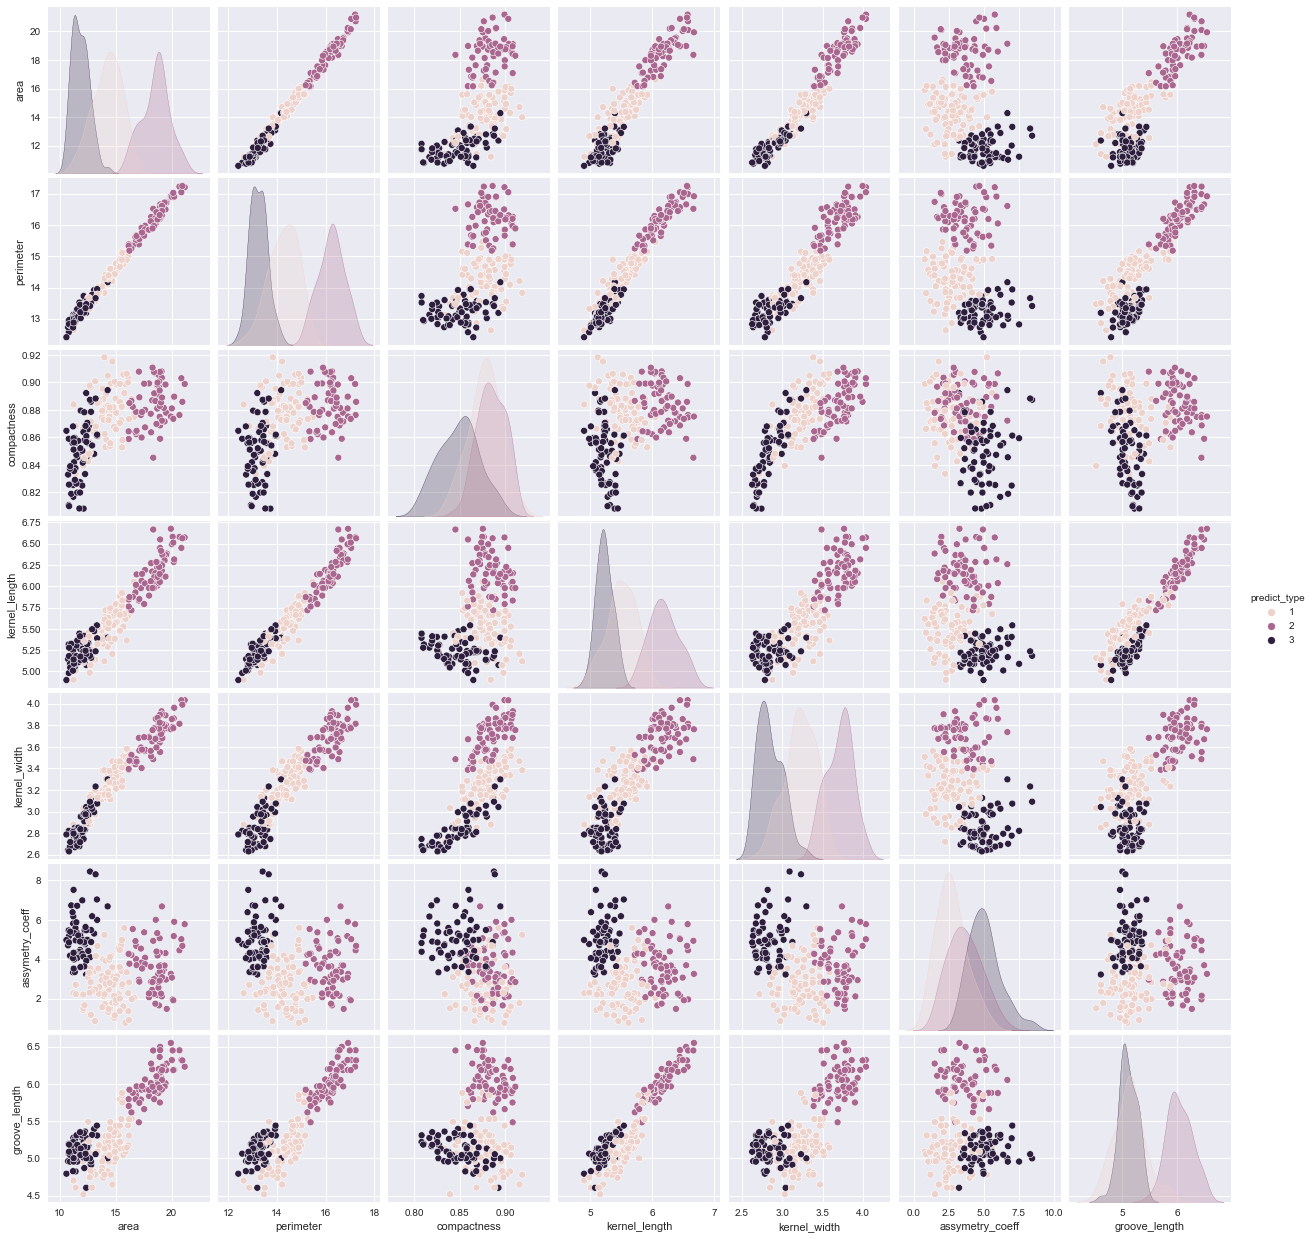

In [237]:
pairplot(data=Origin_data, hue="predict_type", 
         vars=['area', 'perimeter', 'compactness', 'kernel_length','kernel_width', 'assymetry_coeff','groove_length'])